In [50]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

q = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows-2021/netflixData.csv")
print(q.head())

                                Show Id                          Title  \
0  cc1b6ed9-cf9e-4057-8303-34577fb54477                       (Un)Well   
1  e2ef4e91-fb25-42ab-b485-be8e3b23dedb                         #Alive   
2  b01b73b7-81f6-47a7-86d8-acb63080d525  #AnneFrank - Parallel Stories   
3  b6611af0-f53c-4a08-9ffa-9716dc57eb9c                       #blackAF   
4  7f2d4170-bab8-4d75-adc2-197f7124c070               #cats_the_mewvie   

                                         Description  \
0  This docuseries takes a deep dive into the luc...   
1  As a grisly virus rampages a city, a lone man ...   
2  Through her diary, Anne Frank's story is retol...   
3  Kenya Barris and his family navigate relations...   
4  This pawesome documentary explores how our fel...   

                      Director  \
0                          NaN   
1                       Cho Il   
2  Sabina Fedeli, Anna Migotto   
3                          NaN   
4             Michael Margolis   

             

In [51]:
print(q.isnull().sum())

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64


After using  it there're alot of missing data so I'll try to clean my data .before removing the unused data I'll make the first step to build the Recommendation System 

In [52]:
q = q[["Title", "Description", "Content Type", "Genres"]]
print(q.head())


                           Title  \
0                       (Un)Well   
1                         #Alive   
2  #AnneFrank - Parallel Stories   
3                       #blackAF   
4               #cats_the_mewvie   

                                         Description Content Type  \
0  This docuseries takes a deep dive into the luc...      TV Show   
1  As a grisly virus rampages a city, a lone man ...        Movie   
2  Through her diary, Anne Frank's story is retol...        Movie   
3  Kenya Barris and his family navigate relations...      TV Show   
4  This pawesome documentary explores how our fel...        Movie   

                                           Genres  
0                                      Reality TV  
1  Horror Movies, International Movies, Thrillers  
2             Documentaries, International Movies  
3                                     TV Comedies  
4             Documentaries, International Movies  


so according to the data it contain 3 things 
firstly The title column contains the titles of movies and TV shows on Netflix.
Secondly :The title column contains the titles of movies and TV shows on Netflix.
then:The Content Type column tells us if it’s a movie or a TV show. 
And Finally :The Genre column contains all the genres of the TV show or the movie.


Droping the rows containing null values .

In [53]:
q = q.dropna()

<Axes: ylabel='Content Type'>

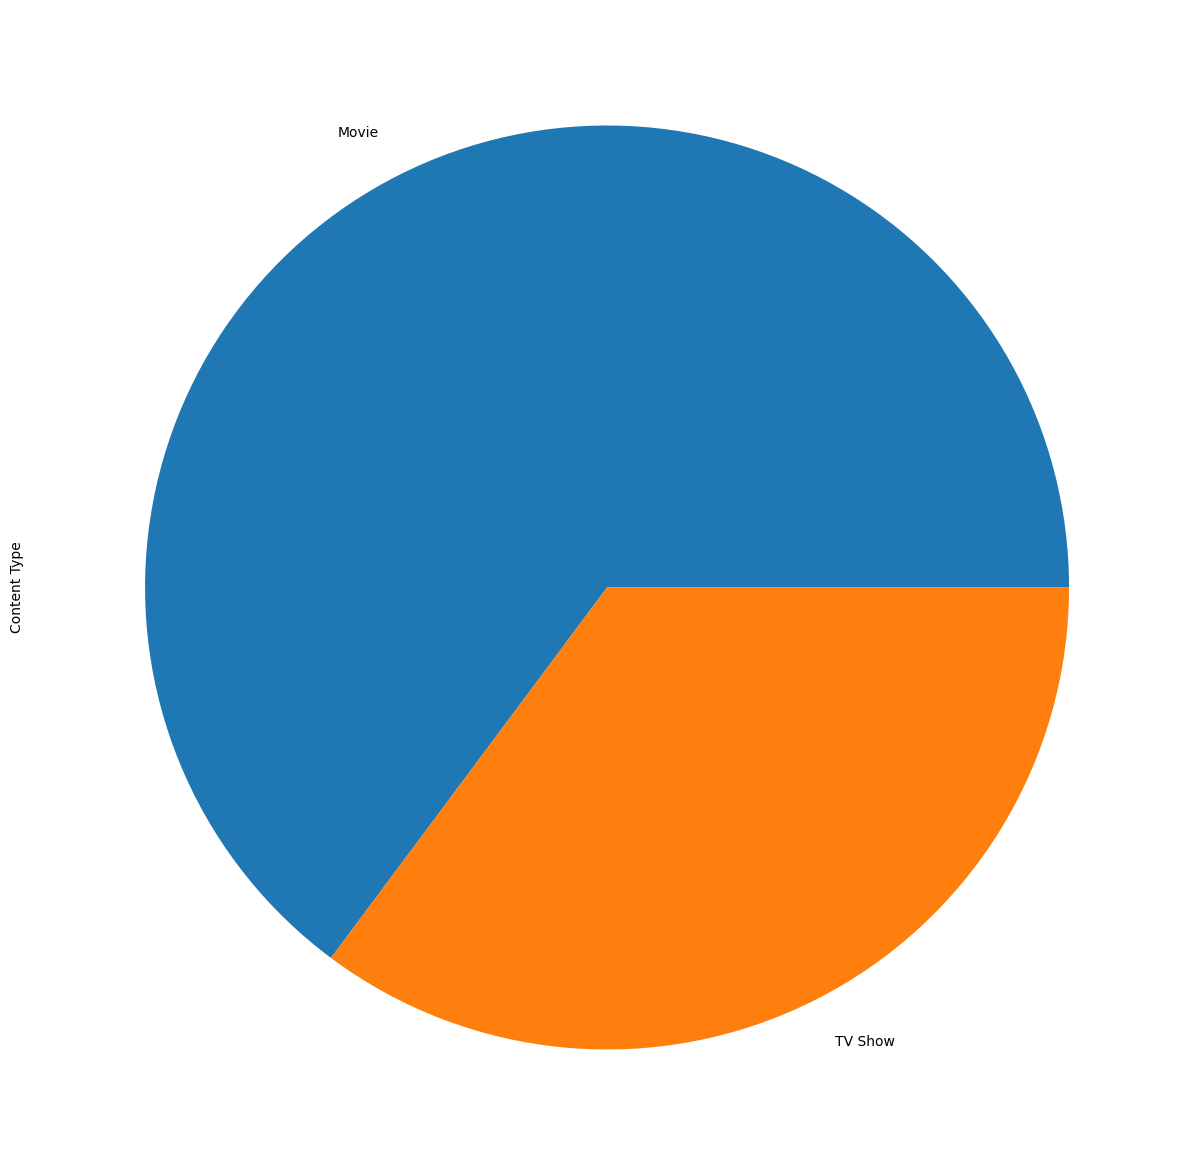

In [54]:
q["Content Type"].value_counts().plot(kind='pie',figsize=(15,15))

Now I will clean the Title column as it contains some data preparation

In [55]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
q["Title"] = q["Title"].apply(clean)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
print(q.Title.sample(10))

1027                    citi tini light
1447    einsatzgruppen nazi death squad
2331                          jailbreak
4752                       darkest hour
1876                          goosebump
3826                       raat ake hai
3383               nevenka break silenc
59                               republ
988                chris delia man fire
3370                       naughti jatt
Name: Title, dtype: object


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'q' is your DataFrame or a dictionary containing the 'Genres' column
feature = q["Genres"].tolist()  # Convert 'Genres' column to a list if it's not already a list

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Fit and transform the data using the TF-IDF vectorizer
tfidf_matrix = tfidf.fit_transform(feature)

# Calculate cosine similarity
similarity = cosine_similarity(tfidf_matrix)


In [58]:
indices = pd.Series(q.index, 
                    index=q['Title']).drop_duplicates()

In [59]:
def netFlix_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    movieindices = [i[0] for i in similarity_scores]
    return q['Title'].iloc[movieindices]

print(netFlix_recommendation("girlfriend"))

3                          blackaf
285                     washington
417                 arrest develop
434     astronomi club sketch show
451    aunti donna big ol hous fun
656                      big mouth
752                bojack horseman
805                   brew brother
935                       champion
937                  chappell show
Name: Title, dtype: object


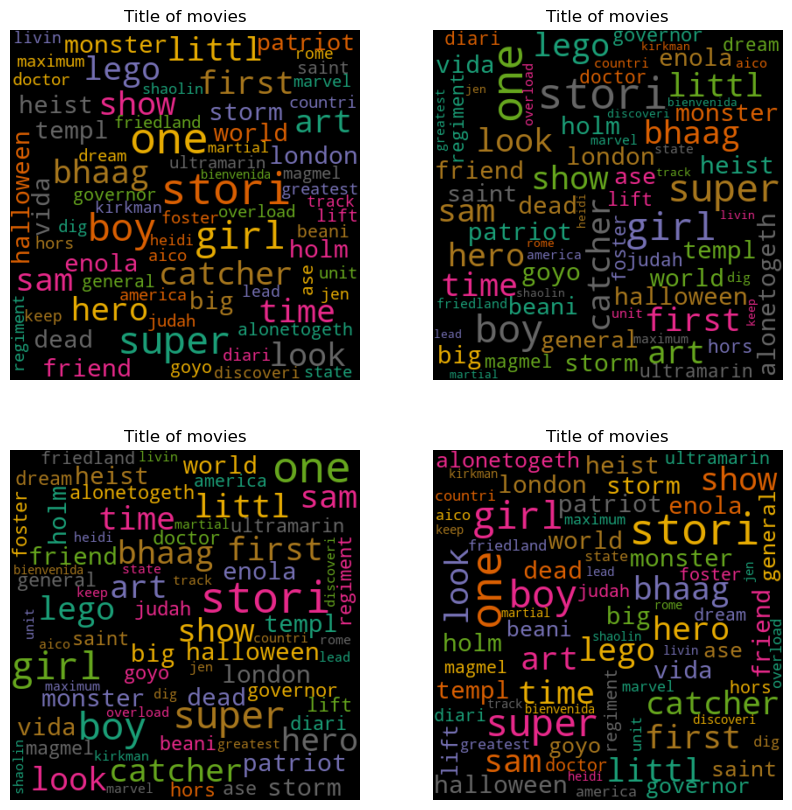

In [60]:
from wordcloud import WordCloud  # Import the WordCloud class

# Assuming Titles is a list of movie titles
Titles = sample['Title'].values  # Get the movie titles from the 'Title' column in the sample
Title = " ".join(i for i in Titles)  # Concatenate titles into a single string

fig = plt.figure(figsize=(10, 10))
for i in range(4):
    wordcloud = WordCloud(width=400, height=400, max_font_size=50, max_words=70, colormap="Dark2").generate(Title)
    plt.subplot(2, 2, i+1)
    plt.title('Title of movies')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.show()
